<a href="https://colab.research.google.com/github/amrahmani/Machine-Learning/blob/main/Ch3_LogisticRegression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:** Predicting whether a student will pass (1) or fail (0) based on study hours and number of previous passes.

**Dataset:** Sample dataset with two predictor variables:
Study Hours, Previous Passes.

https://github.com/amrahmani/Machine-Learning/blob/main/student_data.csv


**Objective:** Fit a **Logistic Regression Model** to the data to predict the probability of passing for a new student.

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
df = pd.read_csv(url)
print(df.head())

# Define predictor variables (Study Hours and Previous Passes) and target variable (Pass/Fail)
X = df[['Study Hours', 'Previous Passes']]
y = df['Pass/Fail']

# Use info() and describe()
df.info()
df.describe()

   Student ID  Assignments Completed  Attendance Rate  Previous GPA  \
0           1                     11             0.76          3.41   
1           2                      8             0.84          3.24   
2           3                     12             1.00          2.86   
3           4                      9             0.74          3.53   
4           5                     11             0.95          3.43   

   Study Hours  Previous Passes  Pass/Fail  
0            3                1          0  
1           19                5          1  
2           20                4          1  
3            1                2          0  
4           21                5          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student ID             100 non-null    int64  
 1   Assignments Completed  100 non-null    

,Student ID,Assignments Completed,Attendance Rate,Previous GPA,Study Hours,Previous Passes,Pass/Fail
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,9.910000,0.852700,2.992900,15.190000,3.430000,0.580000
std,29.011492,2.871296,0.100392,0.505262,8.427582,2.230437,0.496045
min,1.000000,5.000000,0.660000,1.840000,0.000000,0.000000,0.000000
25%,25.750000,7.000000,0.770000,2.667500,8.000000,1.000000,0.000000
50%,50.500000,10.000000,0.840000,2.945000,16.000000,4.000000,1.000000
75%,75.250000,12.000000,0.922500,3.300000,21.250000,5.000000,1.000000
max,100.000000,14.000000,1.140000,4.530000,29.000000,7.000000,1.000000


**Visualizations:** Distribution of Study Hours and Previous Passes

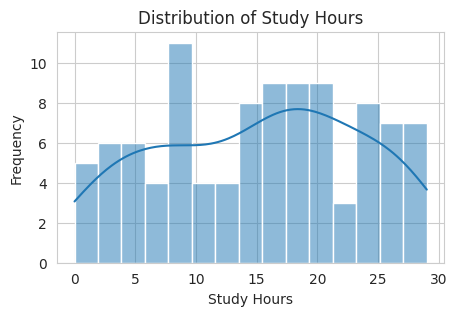

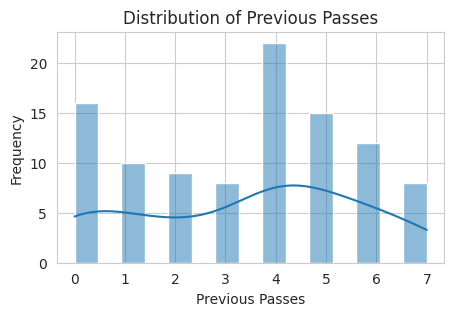

In [12]:
# Distribution of Study Hours
plt.figure(figsize=(5, 3))
sns.histplot(df['Study Hours'], bins=15, kde=True)
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

# Distribution of Previous Passes
plt.figure(figsize=(5, 3))
sns.histplot(df['Previous Passes'], bins=15, kde=True)
plt.title('Distribution of Previous Passes')
plt.xlabel('Previous Passes')
plt.ylabel('Frequency')
plt.show()


**Scatter Plots for Each Feature vs. Pass/Fail**

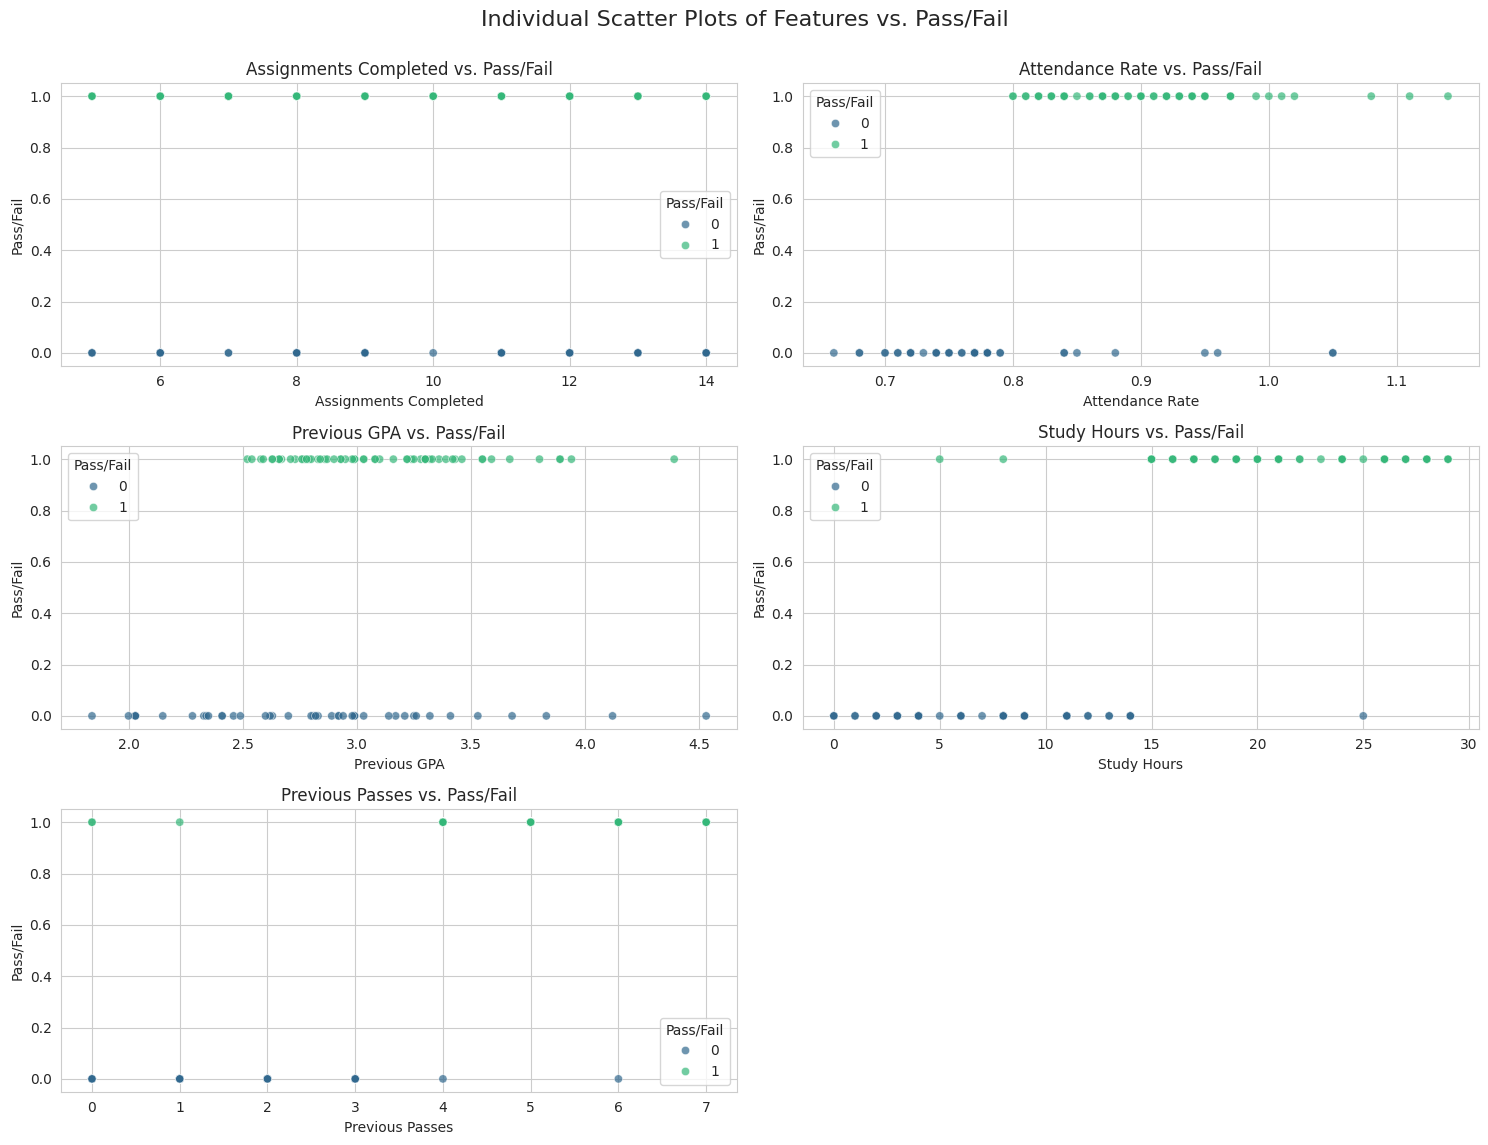

In [14]:
# Set the style for the plots
sns.set_style("whitegrid")

# List of independent features to plot against 'Pass/Fail'
# Exclude 'Student ID' if it's just an identifier and not a meaningful feature for correlation
features_to_plot = [
    'Assignments Completed',
    'Attendance Rate',
    'Previous GPA',
    'Study Hours',
    'Previous Passes'
]

# Define the target variable
target_variable = 'Pass/Fail'

# Create a figure to hold multiple subplots
# Adjust figsize as needed based on the number of plots
plt.figure(figsize=(15, 12)) # Adjust figure size for better display

# Determine the number of rows and columns for the subplot grid
num_features = len(features_to_plot)
n_cols = 2 # You can adjust this for more columns if desired
n_rows = (num_features + n_cols - 1) // n_cols # Calculate rows needed

# Loop through each feature and create a scatter plot
for i, feature in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1) # Create subplot for each feature

    # Create the scatter plot
    # x: the current feature, y: the target variable
    # hue: colors points by 'Pass/Fail' category
    # palette: defines the colors (optional, but 'viridis' or 'plasma' often work well)
    # alpha: sets transparency, useful for overlapping points
    sns.scatterplot(x=df[feature], y=df[target_variable], hue=df[target_variable], palette='viridis', alpha=0.7)

    plt.title(f'{feature} vs. {target_variable}') # Set title for each subplot
    plt.xlabel(feature) # Set x-axis label
    plt.ylabel(target_variable) # Set y-axis label

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle

# Add a main title for the entire set of plots
plt.suptitle(f'Individual Scatter Plots of Features vs. {target_variable}', fontsize=16)

# Display the plots
plt.show()

**Correlation** **Heatmap**

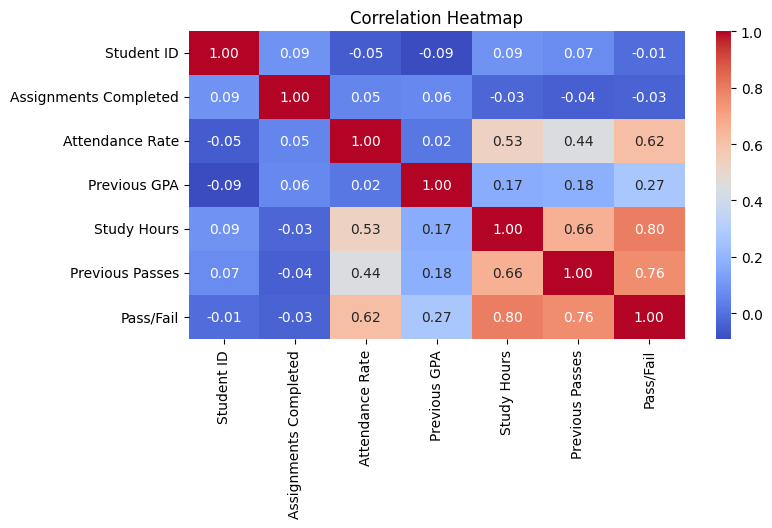

In [3]:
# Correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Split** the data and **Fit** the model

In [4]:
# Split the data into training and testing sets
# 80% of the data will be used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = logreg.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


**Example**: Predict the probability of passing for a new student


In [5]:
# Define new student data: np.array([[study hours, previous passes]]
new_student = np.array([[12, 7]])

# Predict the probability of passing for the new student
probability_of_passing = logreg.predict_proba(new_student)[0][1]
print(f'Probability of passing for the new student: {probability_of_passing:.2f}')

Probability of passing for the new student: 0.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Problem 2:** We have a dataset of received emails with two classes: Spam and Not Spam.

**Objective:** Using **Multinomial Naïve Bayes**, classify new emails as Spam or Not Spam based on word occurrences.

   10am  about  account  assistance  at  attached  bahamas  bank  been  \
0     0      0        0           0   0         0        0     0     0   
1     0      0        0           1   0         0        0     0     0   
2     0      0        0           0   0         0        0     0     0   
3     0      0        1           0   0         0        0     0     1   
4     0      0        0           0   0         0        1     0     0   

   birthday  ...  tomorrow  transfer  update  urgent  us  vacation  will  win  \
0         0  ...         0         0       0       0   0         0     0    0   
1         0  ...         0         1       0       0   0         0     0    0   
2         0  ...         0         0       0       0   0         0     0    0   
3         0  ...         0         0       0       0   0         0     0    0   
4         0  ...         0         0       0       0   0         1     0    1   

   you  your  
0    1     0  
1    0     1  
2    0     0  
3    0  

/tmp/ipython-input-7-3818058141.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_frequencies.values, y=word_frequencies.index, palette='viridis')


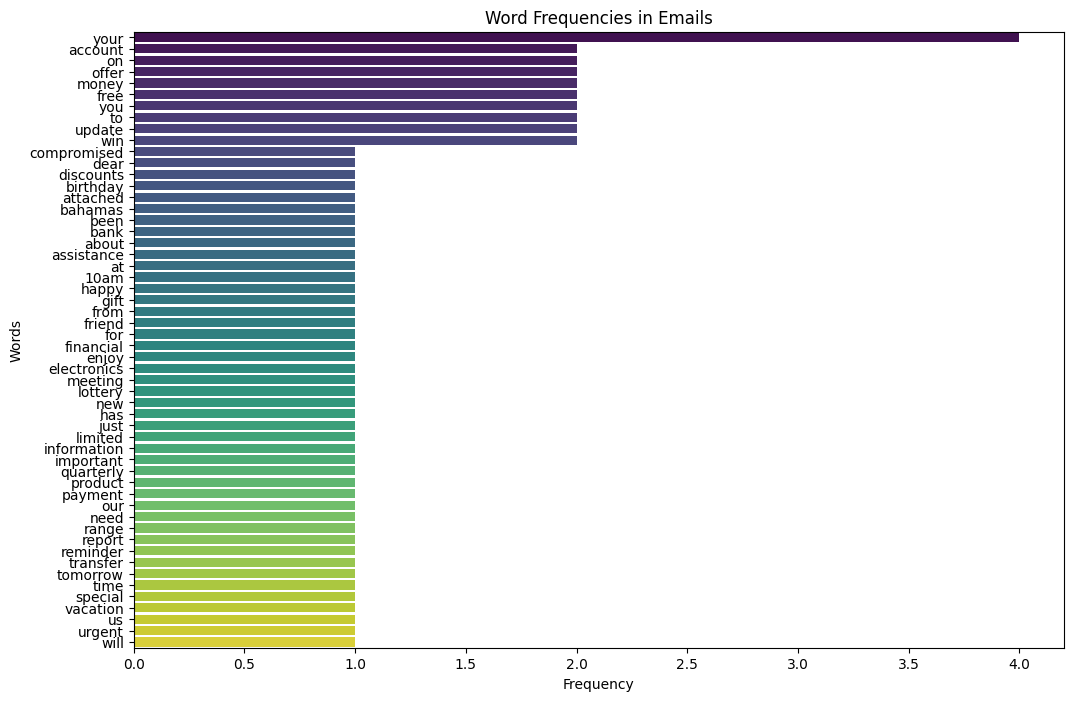

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample email texts
emails = [
    "Free money offer just for you",
    "Dear friend, I need your assistance to transfer money",
    "Discounts on our new product range",
    "Your account has been compromised",
    "Win a free vacation to Bahamas",
    "Important update about your bank account",
    "Limited time offer on electronics",
    "Urgent! Update your payment information",
    "You will win a lottery",
    "Reminder: Meeting tomorrow at 10am",
    "Quarterly financial report attached",
    "Happy birthday! Enjoy a special gift from us"
]

# Labels for the emails: 1 for Spam, 0 for Not Spam
labels = [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0]

# Convert the text data into a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
X = X.toarray()

# Create a DataFrame
df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
print(df.head())

# Sum the occurrences of each word
word_frequencies = df.sum(axis=0).sort_values(ascending=False)

print(word_frequencies)

# Plot histogram of word frequencies
plt.figure(figsize=(12, 8))
sns.barplot(x=word_frequencies.values, y=word_frequencies.index, palette='viridis')
plt.title('Word Frequencies in Emails')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

**Split** the data and **Fit** the model

In [8]:
df['label'] = labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.3, random_state=42)

# Initialize the Multinomial Naïve Bayes model
nb_model = MultinomialNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Confusion Matrix:
 [[1 1]
 [0 2]]


**Example**: Predict the probability of a new email being spam

In [9]:
# Sample new emails
new_emails = [
    "Congratulations! You have been selected for a prize",
    "How are you?",
    "Special offer just for you on our new collection",
    "Urgent: Your account security"
]

# Transform the new emails into the same format as the training data
new_X = vectorizer.transform(new_emails)
new_X = new_X.toarray()

# Predict the labels for new emails
new_predictions = nb_model.predict(new_X)
new_probabilities = nb_model.predict_proba(new_X)

# Display the results
for i in range(len(new_emails)):
    print(f"Email: {new_emails[i]}")
    print(f"Predicted Label: {'Spam' if new_predictions[i] == 1 else 'Not Spam'}")
    print(f"Probability: Spam: {new_probabilities[i][1]:.4f}, Not Spam: {new_probabilities[i][0]:.4f}")
    print()

Email: Congratulations! You have been selected for a prize
Predicted Label: Spam
Probability: Spam: 0.7259, Not Spam: 0.2741

Email: How are you?
Predicted Label: Spam
Probability: Spam: 0.6955, Not Spam: 0.3045

Email: Special offer just for you on our new collection
Predicted Label: Spam
Probability: Spam: 0.8026, Not Spam: 0.1974

Email: Urgent: Your account security
Predicted Label: Spam
Probability: Spam: 0.8412, Not Spam: 0.1588



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


**Practice:**

**Task 1:** Improve the accuracy of the Multinomial Naïve Bayes model by engineering new features.


Create Additional Features:
1- Include the presence of common spam words like "free", "win", "urgent", etc. 2- Include the frequency of punctuation marks such as "!", "?", etc.
Re-train the Model:

Add these new features to the existing dataset.
Split the dataset into training and testing sets.
Train the model on the new dataset.
Evaluate the model's performance. Compare the accuracy, precision, recall, and F1-score of the model before and after feature engineering.

**Task 2**: Implement cross-validation to evaluate the model's performance more robustly.


Implement K-Fold Cross-Validation: Use KFold or StratifiedKFold from sklearn to perform cross-validation. Choose an appropriate number of folds (e.g., 5 or 10).
Evaluate the Model:
Train and evaluate the Multinomial Naïve Bayes model using cross-validation. Compare the cross-validation results with the results obtained from a single train-test split.